# 1) KNN

In [1]:
import os
import pandas as pd

os.chdir("../pydata")
df = pd.read_csv('knn.csv')

print(df.head())
print(df.shape)

      x1     x2    y
0   9.96  4.600  1.0
1  11.00 -0.168  0.0
2  11.50  5.210  1.0
3   8.69  1.540  0.0
4   8.11  4.290  0.0
(26, 3)


In [2]:
X = df.iloc[:, 0:2]
y = df.iloc[:,2]

print(X.head())
print(y.head())

print("********")

print(X.shape)
print(y.shape)

      x1     x2
0   9.96  4.600
1  11.00 -0.168
2  11.50  5.210
3   8.69  1.540
4   8.11  4.290
0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: y, dtype: float64
********
(26, 2)
(26,)


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 80% for training and 20% for testing
# The random_state parameter is used to ensure reproducibility
# of the results
# The stratify parameter is used to ensure that the proportion of
# classes in the training and testing sets is the same as in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.head())
print("********")
print(X_test.head())

      x1    x2
17  8.18  1.30
19  9.32  5.10
10  9.18  5.09
22  8.34  1.64
18  8.73  2.49
********
       x1     x2
23   9.50  1.940
6   11.90  4.650
0    9.96  4.600
25  11.60  1.340
1   11.00 -0.168


In [5]:
# 분류기 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련데이터를 모델에 넣어 모델을 학습시킨다
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# 테스트 데이터 예측
result = clf.predict(X_test)
print(f'prediction result={result}')

# 평균 정확도 구하기
# returns the mean accuracy on the given test data and labels
avg_score = clf.score(X_test, y_test) 
print(f'average accuracy score={avg_score}')

# 소수점 반올림으로 정확도 계산
print(round(avg_score, 3))

prediction result=[1. 1. 1. 0. 0. 1. 1.]
average accuracy score=0.8571428571428571
0.857


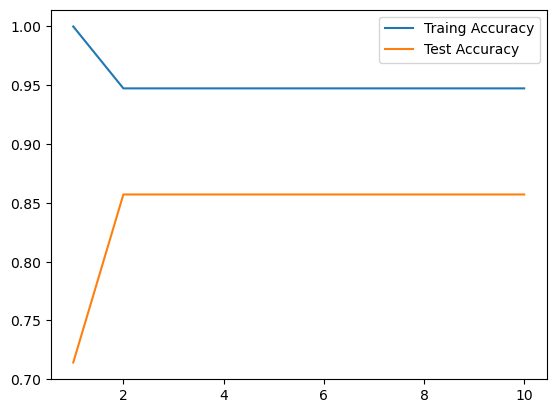

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt     # pyplot 패키지 로딩
train_accuracy = []                  # 결과를 받는 빈 리스트
test_accuracy = []
n_neighbors_settings = range(1, 11)  # 1~10까지 변경

for n_neighbors in n_neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    # 객체 생성
    clf.fit(X_train, y_train)                              # 모델 훈련
    train_accuracy.append(clf.score(X_train, y_train))     # 훈련 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))        # 테스트 정확도 저장
    
plt.plot(n_neighbors_settings, train_accuracy, label="Traing Accuracy") # 훈련 정확도
plt.plot(n_neighbors_settings, test_accuracy, label="Test Accuracy")    # 테스트 정확도
plt.legend()                                                            # 범주
plt.show()

# KNN Regressor

In [15]:
import os
import pandas as pd

os.chdir("../pydata")
df = pd.read_csv('wave.csv')   

print(df.head())
print(df.shape)                

       x      y
0 -0.753 -0.448
1  2.700  0.331
2  1.390  0.779
3  0.592  0.035
4 -2.060 -1.390
(40, 2)


In [9]:
X = df.iloc[:, 0]              # 첫 번째 컬럼
y = df.iloc[:, 1]              # 두 번째 컬럼

print(X.head())
print(y.head())

print(X.shape)                 # (40,)
print(y.shape)                 # (40,)

0   -0.753
1    2.700
2    1.390
3    0.592
4   -2.060
Name: x, dtype: float64
0   -0.448
1    0.331
2    0.779
3    0.035
4   -1.390
Name: y, dtype: float64
(40,)
(40,)


In [10]:
type(X)

pandas.core.series.Series

In [11]:
X = X.to_frame()
print(X.shape)
print(type(X))

(40, 1)
<class 'pandas.core.frame.DataFrame'>


In [12]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# K=3로 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
print("prediction:", reg.predict(X_test))

prediction: [ 0.91333333 -1.75666667  0.35676667  0.35676667 -1.76       -1.84333333
 -0.65833333  1.39133333  0.04216667  0.66666667]


In [14]:
print(round(reg.score(X_test, y_test), 3))

0.789
